In [1]:
ls

sample_data/  synthlabs_train_generated.json


In [3]:
import pandas as pd

df = pd.read_json('data/synthlabs_train_generated.json')
df

,age,sex,ancestry,household_language,lifestyle,class_of_worker,health_insurance,religion,employment_status,income,...,ideology,disability,occupation_category,race,family_presence_and_age,ability_to_speak_english,cognitive_difficulty,hearing_difficulty,fertility,vision_difficulty
0,45,Female,English,English,Adventurous despite disability,Private,With health insurance coverage,Catholic,Not in labor force,59000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,Female,NaN,NaN,Active and community-oriented,Employee of a private for-profit company or bu...,NaN,Religiously Unaffiliated,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70,Male,NaN,English only,Relaxed and leisurely,NaN,NaN,NaN,NaN,94900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66,Female,NaN,NaN,NaN,NaN,With health insurance coverage,Catholic,NaN,NaN,...,Liberal,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,Female,NaN,NaN,NaN,NaN,With health insurance coverage,NaN,NaN,NaN,...,Progressive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,69,Female,Mexican and Spanish,NaN,NaN,"Self-employed in own incorporated business, pr...",NaN,NaN,"Civilian employed, at work",NaN,...,NaN,With a disability,NaN,NaN,NaN,Not well,NaN,NaN,NaN,NaN
1796,45,Female,NaN,NaN,Busy and family-oriented,NaN,NaN,NaN,Not in labor force,NaN,...,Conservative,NaN,OFF-Couriers And Messengers,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1797,62,Female,NaN,NaN,NaN,NaN,NaN,Protestant,NaN,69000.0,...,Believes in individual freedom and community s...,NaN,"OFF-Interviewers, Except Eligibility And Loan",White alone,NaN,Very well,NaN,NaN,NaN,NaN
1798,49,Female,NaN,NaN,Active and community-oriented,NaN,NaN,NaN,Not in labor force,42000.0,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
list(df.keys())

['age',
 'sex',
 'ancestry',
 'household_language',
 'lifestyle',
 'class_of_worker',
 'health_insurance',
 'religion',
 'employment_status',
 'income',
 'defining_quirks',
 'veteran_status',
 'parent_id',
 'id',
 'firstname',
 'lastname',
 'interests',
 'values',
 'biography',
 'medical_condition',
 'reason_for_visit',
 'neg_trait',
 'citizenship',
 'mannerisms',
 'big_five_scores',
 'place_of_birth',
 'marital_status',
 'household_type',
 'political_views',
 'detailed_job_description',
 'personal_time',
 'education',
 'industry_category',
 'ideology',
 'disability',
 'occupation_category',
 'race',
 'family_presence_and_age',
 'ability_to_speak_english',
 'cognitive_difficulty',
 'hearing_difficulty',
 'fertility',
 'vision_difficulty']

/tmp/ipython-input-800814253.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='viridis')


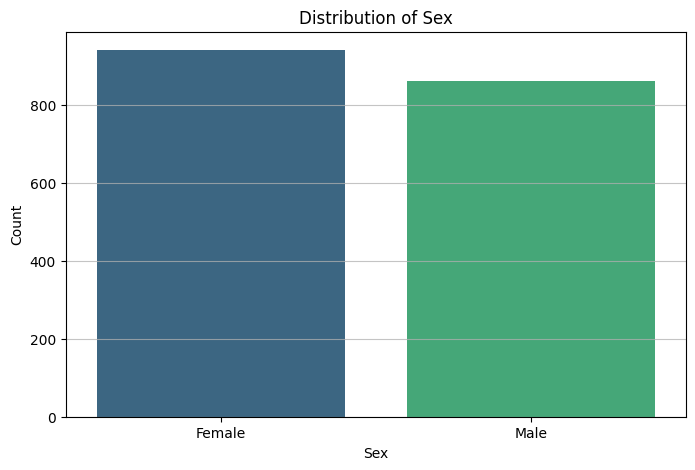

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sex', hue='sex', palette='viridis', legend=False)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

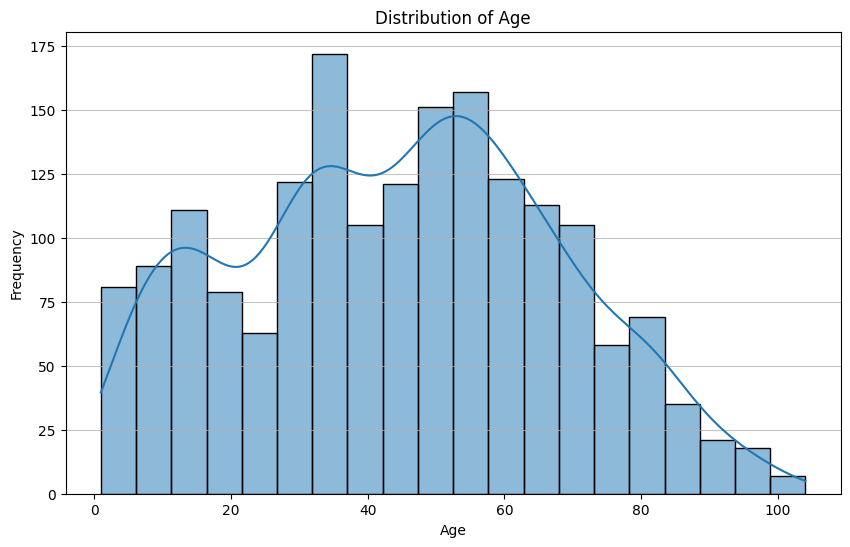

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

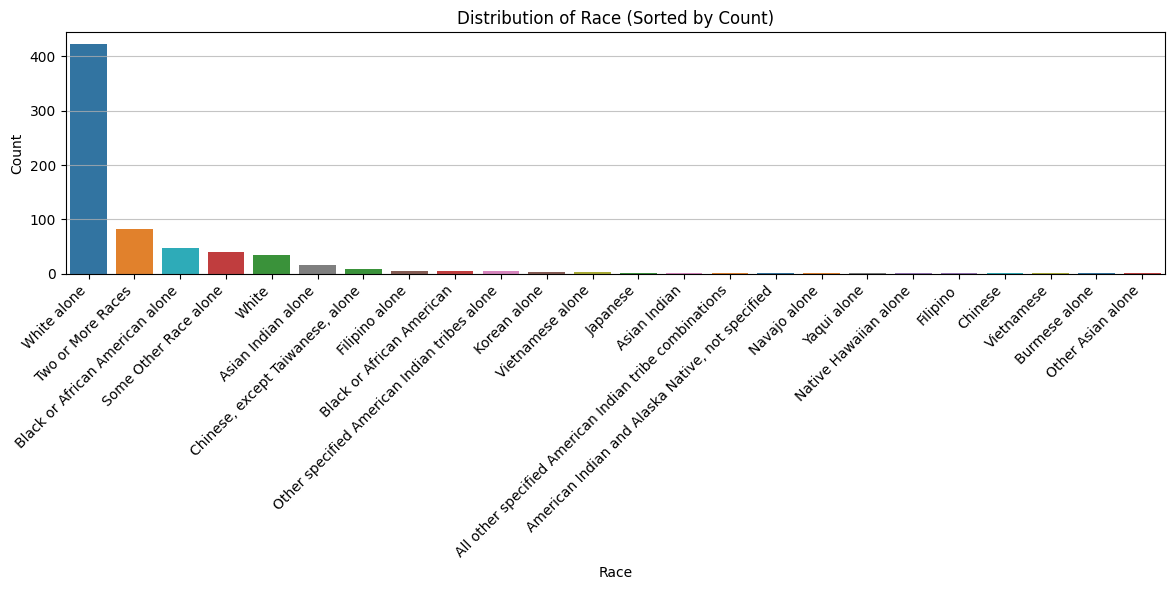

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the order of race categories by count in descending order
race_order = df['race'].value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='race', hue='race', palette='tab10', order=race_order, legend=False)
plt.title('Distribution of Race (Sorted by Count)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

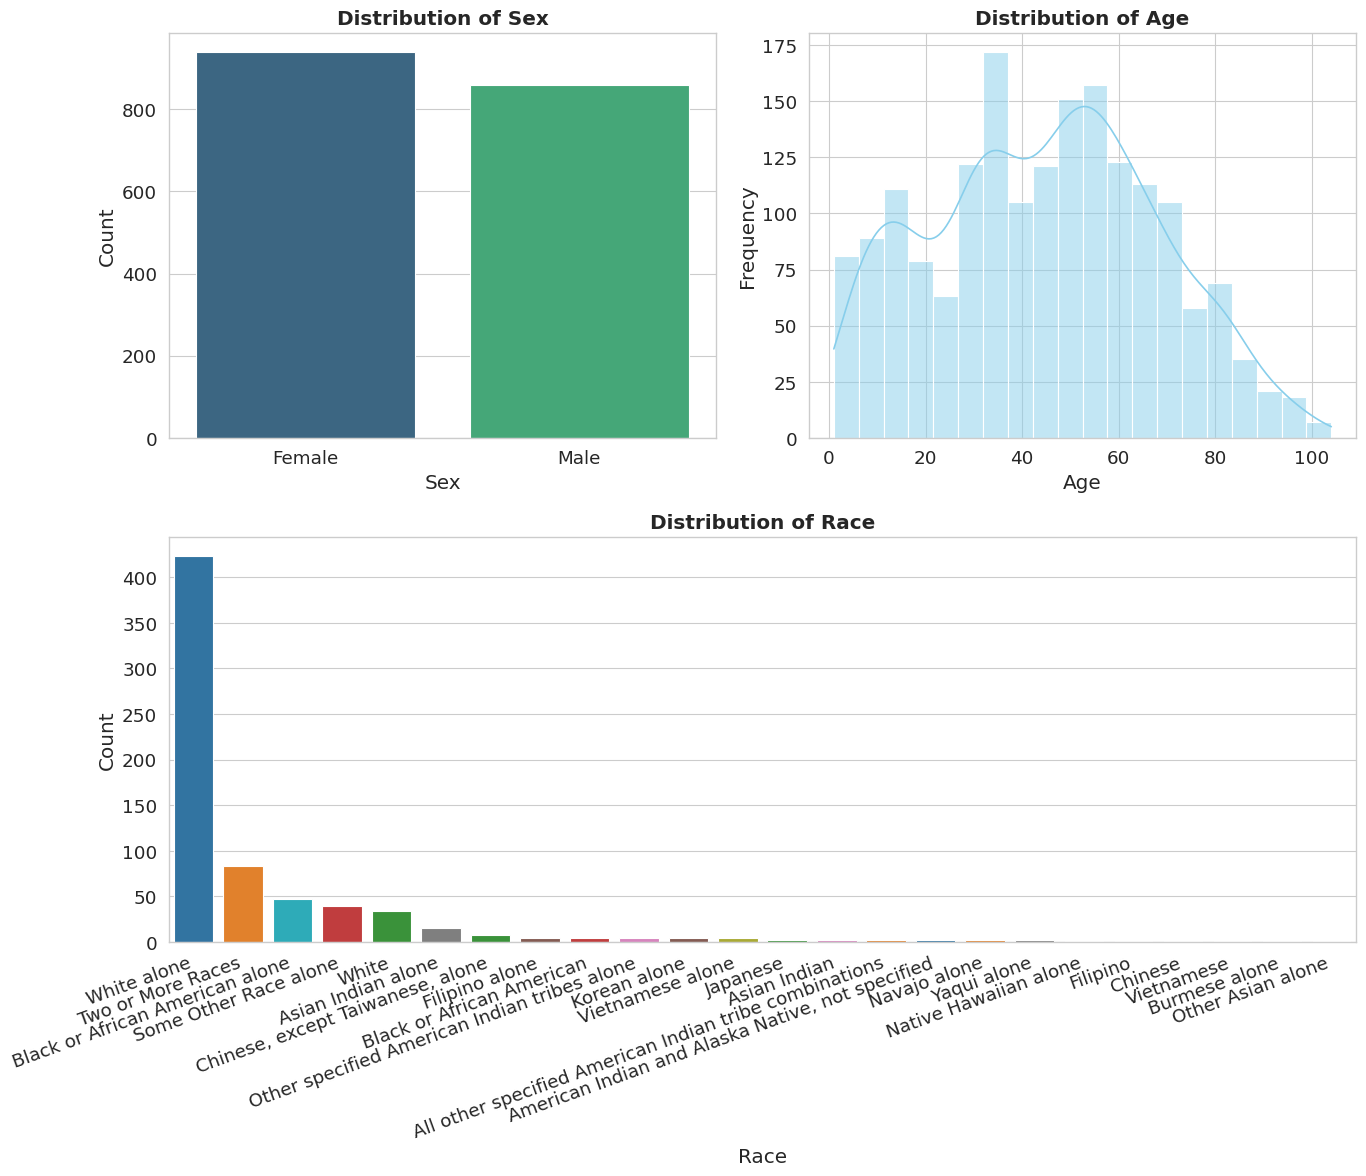

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and increase font size for LaTeX readability
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.5)

# Create figure with a 2x2 layout, where the bottom plot spans 2 columns
plt.figure(figsize=(14, 12))

# 1. Gender Distribution (Top Left)
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='sex', hue='sex', palette='viridis', legend=False)
plt.title('Distribution of Sex', fontweight='bold')
plt.xlabel('Sex')
plt.ylabel('Count')

# 2. Age Distribution (Top Right)
plt.subplot(2, 2, 2)
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 3. Race Distribution (Bottom, spanning full width)
plt.subplot(2, 1, 2)
race_order = df['race'].value_counts().index
sns.countplot(data=df, x='race', hue='race', palette='tab10', order=race_order, legend=False)
plt.title('Distribution of Race', fontweight='bold')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=20, ha='right') # Rotate labels slightly for readability

# Adjust layout and save
plt.tight_layout()
plt.savefig('combined_demographics.pdf', format='pdf', bbox_inches='tight')
plt.show()

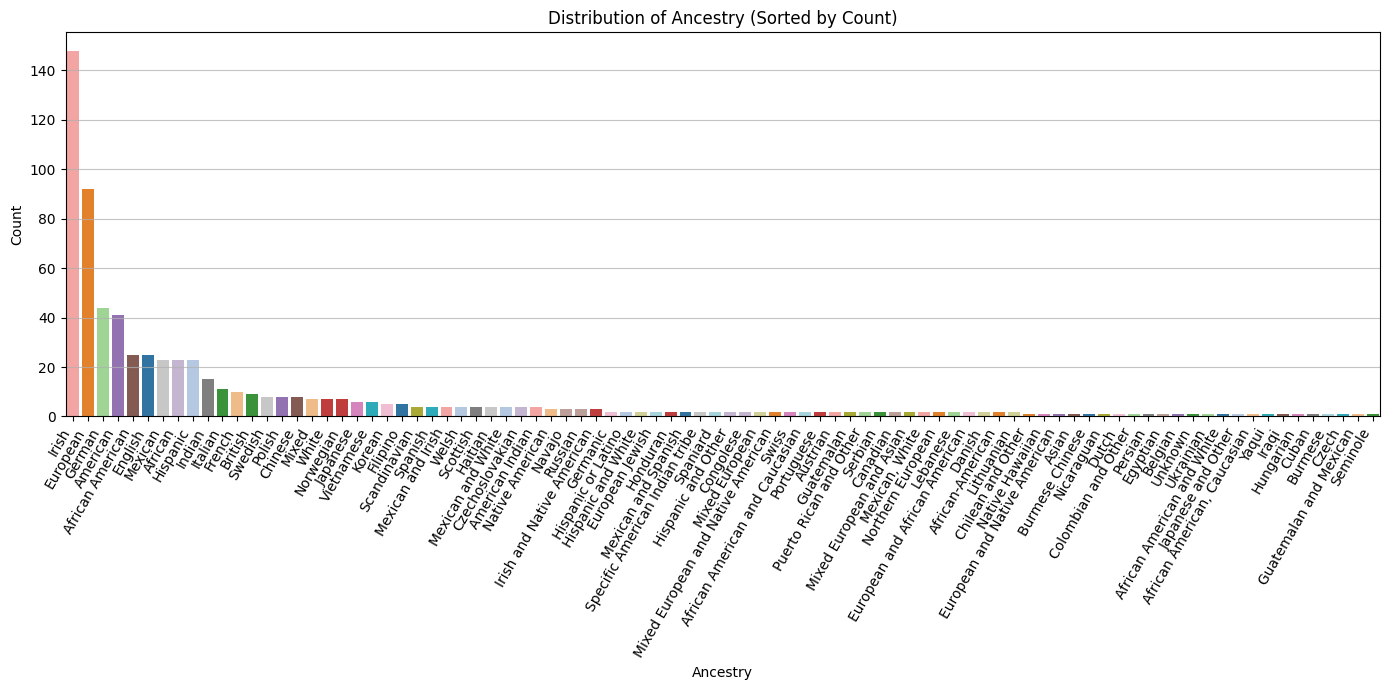

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the order of ancestry categories by count in descending order
ancestry_order = df['ancestry'].value_counts().index

plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='ancestry', hue='ancestry', palette='tab20', order=ancestry_order, legend=False)
plt.title('Distribution of Ancestry (Sorted by Count)')
plt.xlabel('Ancestry')
plt.ylabel('Count')
plt.xticks(rotation=60, ha='right') # Rotate labels for better readability if many categories
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()